# Workshop 7: SNA Measures

COSC2671 Social Media and Network Analytics

Jeffrey Chan, RMIT University, 2022


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [7]:
sFileName = "replayGraph.graphml"

First we read back the graph we constructed and compute the degree centrality

In [8]:
# read it back in to demonstrate it works
replyGraph = nx.readwrite.read_graphml(sFileName)


# computing the degree centrality and plotting it
lDegCentrality = nx.degree_centrality(replyGraph)


# TODO: write code to compute eigenvetor and katz centrality
lEigenVectorCentrality = nx.eigenvector_centrality_numpy(replyGraph)
lKatzCentrality = nx.katz_centrality_numpy(replyGraph)

C:\Users\lukas\anaconda3\envs\smna\lib\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


The following code displayes the histograms of the degree, eigenvector and katz centrality values of the graph.

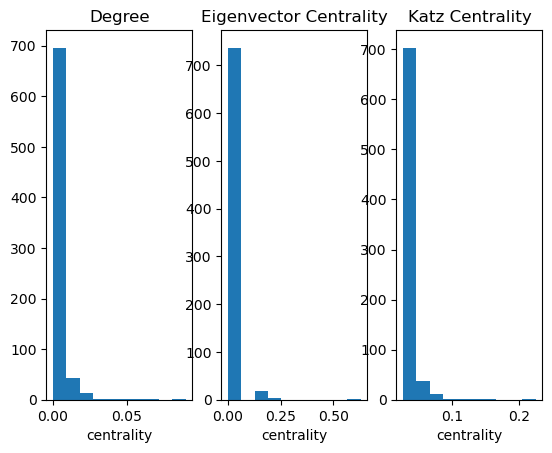

In [9]:
# plot histograms
plt.subplot(1,3,1)
plt.hist(list(lDegCentrality.values()))
plt.title('Degree')
plt.xlabel('centrality')

plt.subplot(1,3,2)
plt.hist(list(lEigenVectorCentrality.values()))
plt.title('Eigenvector Centrality')
plt.xlabel('centrality')

plt.subplot(1,3,3)
plt.hist(list(lKatzCentrality.values()))
plt.title('Katz Centrality')
plt.xlabel('centrality')


plt.show()

The following code computes the SNA statistics/measures to do with centrality, clustering coefficient, connected components and bridges.


In [12]:
#
# TODO: update the node attributes with centrality
#
for nodeId, cent in lDegCentrality.items():
    replyGraph.nodes[nodeId]['degree'] = float(cent)

for nodeId, cent in lEigenVectorCentrality.items():
    replyGraph.nodes[nodeId]['eigen'] = float(cent)

for nodeId, cent in lKatzCentrality.items():
    replyGraph.nodes[nodeId]['katz'] = float(cent)

#
# TODO: write out graph to new file
#
filename = "mod-replayGraph.graphml"
nx.write_graphml(replyGraph, filename)
print("Graph stored as " + filename)


Graph stored as mod-replayGraph.graphml


In [35]:
#
# TODO: compute the other SNA measures specified in the lab
#
transitivity = nx.transitivity(replyGraph)
stronglyConnectedComponents = nx.strongly_connected_components(replyGraph)
weaklyConnectedComponents = nx.weakly_connected_components(replyGraph)
undirectedReplayGraph = replyGraph.to_undirected()
bridges = nx.bridges(undirectedReplayGraph)

print("Global clustering coefficient/Transitivity: " + transitivity.__str__())
print("Number of strongly connected components: " + len(list(stronglyConnectedComponents)).__str__())
print("Number of weakly connected components: " + len(list(weaklyConnectedComponents)).__str__())
print("Number of bridges: " + len(list(bridges)).__str__())

Global clustering coefficient/Transitivity: 0.03319327731092437
Number of strongly connected components: 514
Number of weakly connected components: 35
Number of bridges: 490
